In [2]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [3]:
all_df = pd.read_csv("data/data.csv")

In [4]:
all_df.replace('?',numpy.nan,inplace=True)

In [5]:
all_df = all_df.dropna(how='any')

In [6]:
X=all_df.drop(['Severity'], axis=1).values.astype('float64')

In [7]:
Y = all_df['Severity'].values.astype('int64')

In [8]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

664

In [9]:
test_Features[:2]

array([[-0.20875843, -0.32612337, -1.43517241, -1.157718  ,  0.24046607],
       [-0.20875843,  0.7650629 , -0.62976801, -1.157718  ,  0.24046607]])

In [10]:
train_Label[:4]

array([1, 0, 0, 1])

In [11]:
train_Features.shape

(664, 5)

In [12]:
test_Label[:4]

array([0, 0, 1, 0])

In [13]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [14]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [16]:
model = Sequential()

In [17]:
model.add(LSTM(units=10, input_shape=(5,1)))

In [18]:
model.add(Dense(1, activation = "sigmoid"))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 531 samples, validate on 133 samples
Epoch 1/60
531/531 [==============================] - 3s 6ms/step - loss: 0.6826 - acc: 0.7213 - val_loss: 0.6702 - val_acc: 0.7895
Epoch 2/60
531/531 [==============================] - 1s 1ms/step - loss: 0.6566 - acc: 0.8023 - val_loss: 0.6477 - val_acc: 0.7744
Epoch 3/60
531/531 [==============================] - 1s 1ms/step - loss: 0.6315 - acc: 0.8023 - val_loss: 0.6259 - val_acc: 0.7744
Epoch 4/60
531/531 [==============================] - 1s 1ms/step - loss: 0.6072 - acc: 0.8060 - val_loss: 0.6034 - val_acc: 0.7744
Epoch 5/60
531/531 [==============================] - 1s 952us/step - loss: 0.5819 - acc: 0.8098 - val_loss: 0.5819 - val_acc: 0.7744
Epoch 6/60
531/531 [==============================] - 1s 1ms/step - loss: 0.5569 - acc: 0.8117 - val_loss: 0.5609 - val_acc: 0.7744
Epoch 7/60
531/531 [==============================] - 1s 1ms/step - loss: 0.5314 - acc: 0.8173 - val_loss: 0.5404 - val_acc: 0.7820
Epoch 8/60
531/531 [========

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

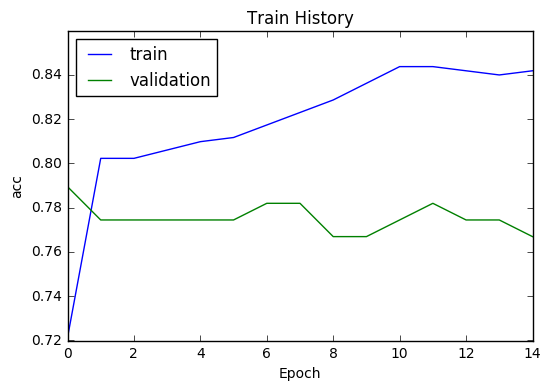

In [23]:
show_train_history(train_history,'acc','val_acc')

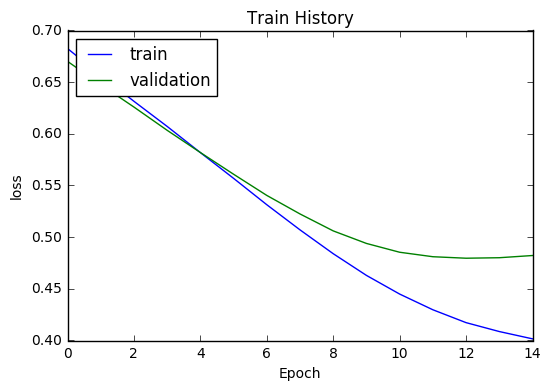

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

166/166 [==============================] - 0s 178us/step


In [26]:
scores[1]

0.8192771084337349